In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

/Users/sdale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [13]:
(raw_train_X, raw_train_y), (raw_test_X, raw_test_y) = mnist.load_data()
train_X = raw_train_X / 255
test_X = raw_test_X / 255
train_X = train_X.reshape(train_X.shape[0], 28*28)
test_X = test_X.reshape(test_X.shape[0], 28*28)
perm = np.random.permutation(train_X.shape[0])
train_X = train_X[perm]
train_y = raw_train_y[perm]
perm = np.random.permutation(test_X.shape[0])
test_X = test_X[perm]
test_y = raw_test_y[perm]
# n = train_X.shape[0]//2
# val_X = train_X[:n]
# val_y = train_y[:n]
# train_X = train_X[n:]
# train_y = train_y[n:]
n = 1000
val_X = train_X[n:2*n]
val_y = train_y[n:2*n]
train_X = train_X[:n]
train_y = train_y[:n]

In [14]:
train_X.shape

(1000, 784)

In [23]:
data = {'num_components': [], 'bic': [], 'aic': []}
for components in tqdm(range(2, 11)):
# for components in tqdm([2, 5, 10, 20, 30, 50, 100]):
    gm = GaussianMixture(n_components=components, random_state=0).fit(train_X)
    aic = gm.aic(val_X)
    bic = gm.bic(val_X)
    # aic = gm.aic(train_X)
    # bic = gm.bic(train_X)
    data['num_components'].append(components)
    data['aic'].append(aic)
    data['bic'].append(bic)

100%|██████████| 9/9 [00:27<00:00,  3.11s/it]


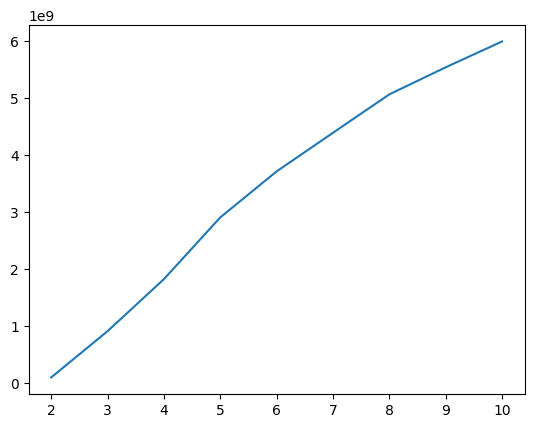

In [24]:
plt.plot(data['num_components'], data['aic'], label='AIC')

In [ ]:
# test_X = test_X.reshape(10000, 28*28)
# perm = np.random.permutation(test_X.shape[0])
# X = test_X[perm]
# y = test_y[perm]
# n = 1000
# X = X[:n]
# y = y[:n]

In [ ]:
gm = GaussianMixture(n_components=10, random_state=0).fit(X[:1000])

In [ ]:
gm.bic()

In [ ]:
y_pred[:10]

In [ ]:
y[:10]

In [ ]:
accuracy_score(y, y_pred)

In [ ]:
mask_3 = y == 1
X_3 = X[mask_3]

In [ ]:
out = gm.predict(X_3)

In [ ]:
gm.bic

In [ ]:
plt.hist(out)